In [98]:
import pandas as pd
import seaborn as sns
import numpy as np
import sys
import matplotlib.pyplot as plt

df_train_original = pd.read_csv('./data/278_labelled_uri_train.csv')
df_train = df_train_original.copy()

In [77]:
df_train.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,139790,139790,139790,179067.000,0.395,0.336,-9.003,0.031,0.824,0.000,0.099,0.189,94.609,0.000,0,spotify:track:75v5io8kU6Llfg2T36zhgd
1,196225,196225,196225,392333.000,0.315,0.611,-6.070,0.050,0.421,0.290,0.117,0.148,146.476,0.000,0,spotify:track:1P1mhYegu7cnXphz3QQZdB
2,117476,117476,117476,115312.000,0.129,0.049,-25.844,0.049,0.970,0.923,0.109,0.411,199.746,0.000,3,spotify:track:7DW0XpB02S7NiWex6tl8tN
3,27767,27767,27767,149201.000,0.676,0.136,-17.745,0.084,0.984,0.925,0.110,0.189,78.227,0.000,3,spotify:track:6wmn2LNYtTowLmGG8uRNru
4,95337,95337,95337,257893.000,0.132,0.098,-23.028,0.040,0.920,0.812,0.107,0.038,69.771,0.000,3,spotify:track:5mRqGsYYMs27rV43dgVmv2


In [78]:
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222350 entries, 0 to 222349
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0.2      222350 non-null  int64  
 1   Unnamed: 0.1      222350 non-null  int64  
 2   Unnamed: 0        222350 non-null  int64  
 3   duration (ms)     222350 non-null  float64
 4   danceability      222350 non-null  float64
 5   energy            222350 non-null  float64
 6   loudness          222350 non-null  float64
 7   speechiness       222350 non-null  float64
 8   acousticness      222350 non-null  float64
 9   instrumentalness  222350 non-null  float64
 10  liveness          222350 non-null  float64
 11  valence           222350 non-null  float64
 12  tempo             222350 non-null  float64
 13  spec_rate         222350 non-null  float64
 14  labels            222350 non-null  int64  
 15  uri               222350 non-null  object 
dtypes: float64(11), int6

None

In [79]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
display(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.2,222350.000,138802.754,80221.472,0.000,69406.250,138656.500,208263.750,277936.000
Unnamed: 0.1,222350.000,138802.754,80221.472,0.000,69406.250,138656.500,208263.750,277936.000
Unnamed: 0,222350.000,138802.754,80221.472,0.000,69406.250,138656.500,208263.750,277936.000
duration (ms),222350.000,232548.210,116804.787,6706.000,172000.000,213200.000,264893.000,3919895.000
danceability,222350.000,0.552,0.189,0.000,0.432,0.571,0.693,0.989
energy,222350.000,0.557,0.280,0.000,0.342,0.591,0.793,1.000
loudness,222350.000,-10.366,6.675,-60.000,-12.742,-8.403,-5.843,4.882
speechiness,222350.000,0.088,0.113,0.000,0.036,0.047,0.082,0.965
acousticness,222350.000,0.387,0.365,0.000,0.034,0.262,0.754,0.996
instrumentalness,222350.000,0.255,0.374,0.000,0.000,0.001,0.647,1.000


In [80]:
df_train.head(5).T

,0,1,2,3,4
Unnamed: 0.2,139790,196225,117476,27767,95337
Unnamed: 0.1,139790,196225,117476,27767,95337
Unnamed: 0,139790,196225,117476,27767,95337
duration (ms),179067.000,392333.000,115312.000,149201.000,257893.000
danceability,0.395,0.315,0.129,0.676,0.132
energy,0.336,0.611,0.049,0.136,0.098
loudness,-9.003,-6.070,-25.844,-17.745,-23.028
speechiness,0.031,0.050,0.049,0.084,0.040
acousticness,0.824,0.421,0.970,0.984,0.920
instrumentalness,0.000,0.290,0.923,0.925,0.812


*Duration*: length of the song in milliseconds
*Danecability*: how danceable
*Energy*: how intense is the song (loud, fast, noisy = higher value)
*Loudness*: How loud is the song
*Speechiness*: presence of spoken words
*Accousticness*: how acoustic the song is (non-electric, i.e. acoustic guitar)
*Instrumentalness*: kinda opposite of speechiness
*Liveness*: whether its a live
*Valence*: how positive the song is
*Tempo*: bpm
*spec_rate*: unknown

*labels*: {'sad': 0, 'happy': 1, 'energetic': 2, 'calm': 3}

In [81]:
df_train.loc[df_train['labels'] == 0, 'labels'] = 'sad'
df_train.loc[df_train['labels'] == 1, 'labels'] = 'happy'
df_train.loc[df_train['labels'] == 2, 'labels'] = 'energetic'
df_train.loc[df_train['labels'] == 3, 'labels'] = 'calm'

In [82]:
df_train['labels'].value_counts(normalize=True)

labels
happy       0.383
sad         0.295
energetic   0.169
calm        0.153
Name: proportion, dtype: float64

<Axes: xlabel='labels', ylabel='count'>

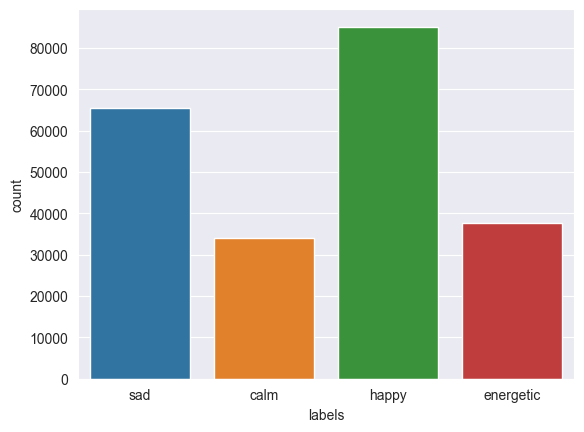

In [83]:
sns.countplot(x='labels', data=df_train)

*Duration*
Assumption: Won't correlate
We use this feature? No!

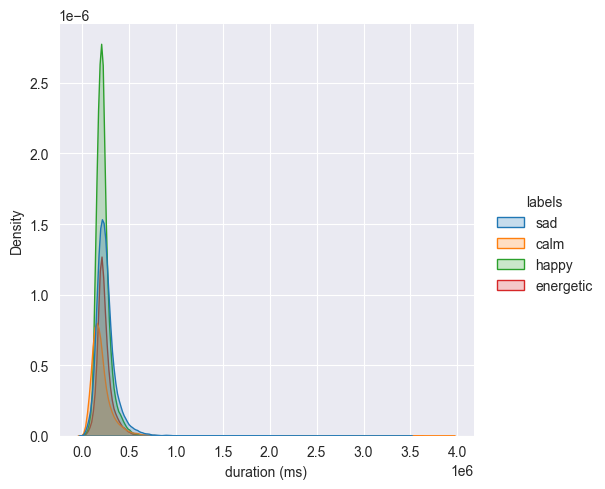

In [86]:
sns.displot(df_train, x="duration (ms)", hue="labels", kind="kde", fill=True)

*danceability*
Assumption: sad songs are less danceable than happy songs
We use this feature? YES!


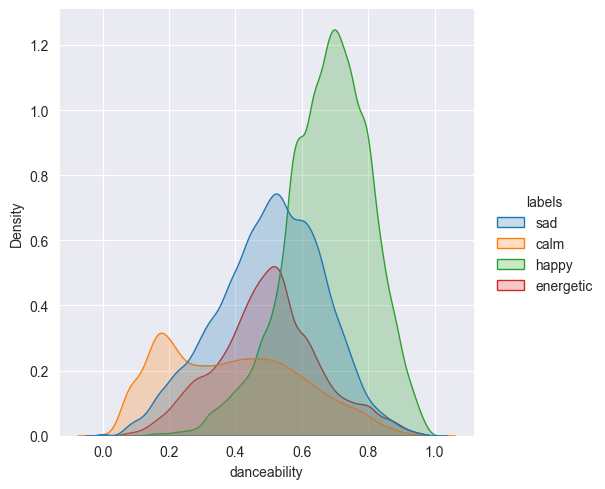

In [87]:
sns.displot(df_train, x="danceability", hue="labels", kind="kde", fill=True)

*Accousticness*
Assumption: energetic sougs are not acoustic. Calm songs are acoustic
We use this? YES!

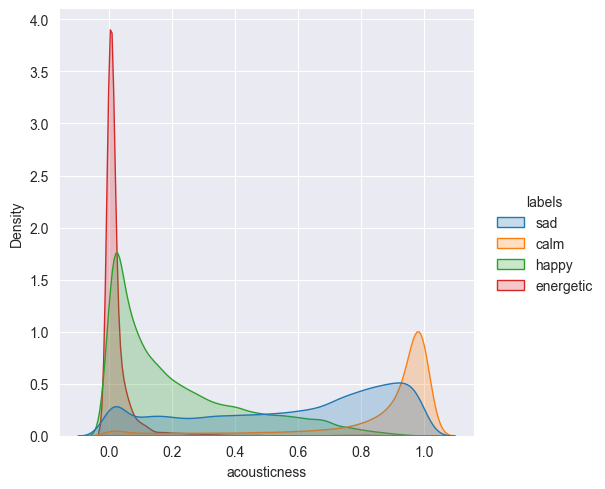

In [88]:
sns.displot(df_train, x="acousticness", hue="labels", kind="kde", fill=True)

*Energy*
Assumption: energetic songs are energetic
We use this? YES! There is a label energetic. Best feature so far.

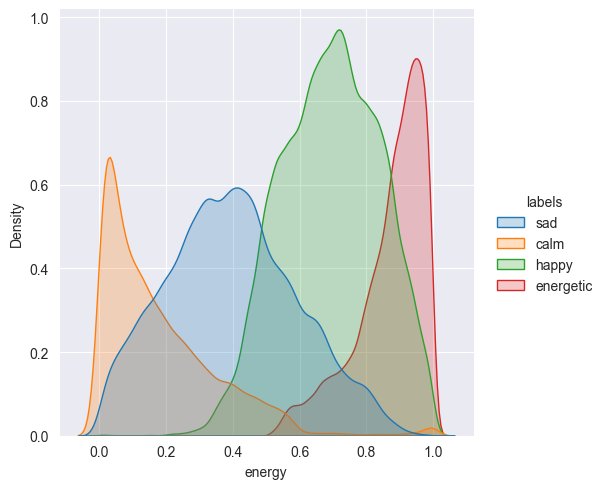

In [89]:
sns.displot(df_train, x="energy", hue="labels", kind="kde", fill=True)

*Loudness*
Assumption: less loud = calm, more loud = energetic / happyWe use this? YES! There is a label energetic
We use this? Yes, good for calm vs rest.

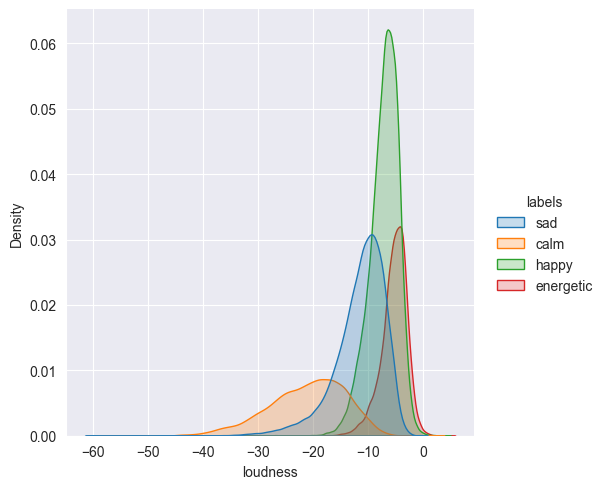

In [90]:
sns.displot(df_train, x="loudness", hue="labels", kind="kde", fill=True)

*Speechiness*
Assumption: Not good to distinguish, every label can have speechy and non-speechy songs
We use this? NO!

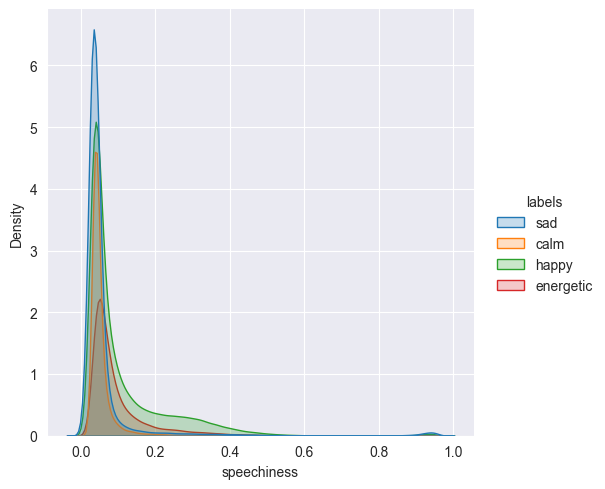

In [91]:
sns.displot(df_train, x="speechiness", hue="labels", kind="kde", fill=True)

*Instrumentalness*
Assumption: Not good to distinguish, every label can have speechy and non-speechy songs
We use this? Maybe to distinguish calm vs rest.

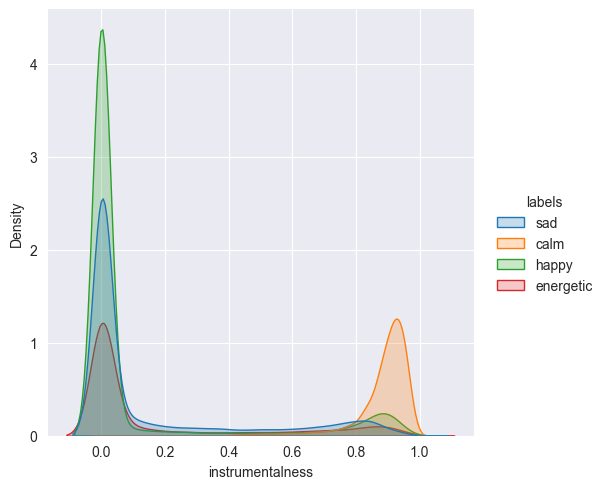

In [92]:
sns.displot(df_train, x="instrumentalness", hue="labels", kind="kde", fill=True)

*Liveness*
Assumption: Every label can be live or in studio. Not good to distinguish
We use this? No!

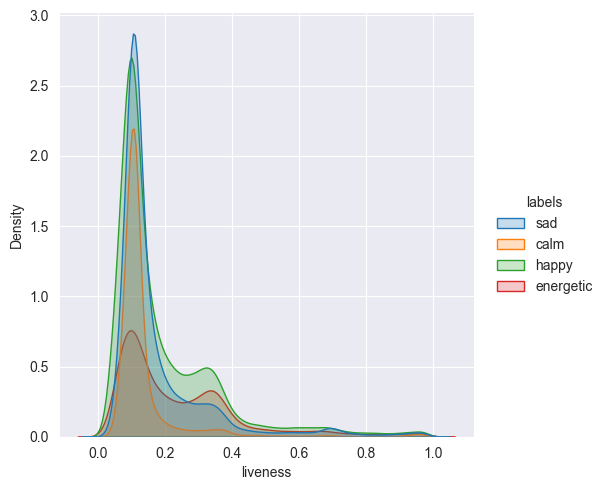

In [93]:
sns.displot(df_train, x="liveness", hue="labels", kind="kde", fill=True)

*Valence*
Assumption: Big impact on sad or happy
We use this? Yes!

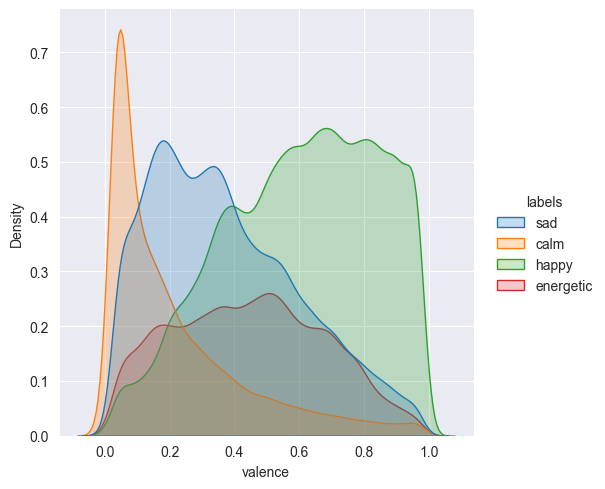

In [94]:
sns.displot(df_train, x="valence", hue="labels", kind="kde", fill=True)

*Tempo*
Assumption: Fast tempo means more energetic, slow tempo maybe calm?
We use this? No! Every label can have fast and slow songs.

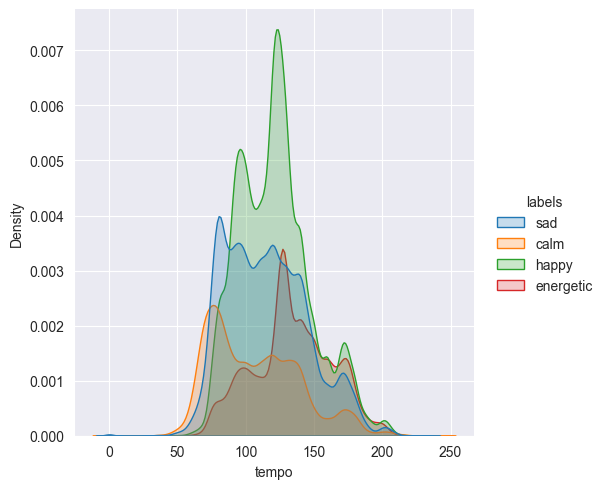

In [95]:
sns.displot(df_train, x="tempo", hue="labels", kind="kde", fill=True)

*Tempo*
Assumption: We don't know what this is.
We use this? No!

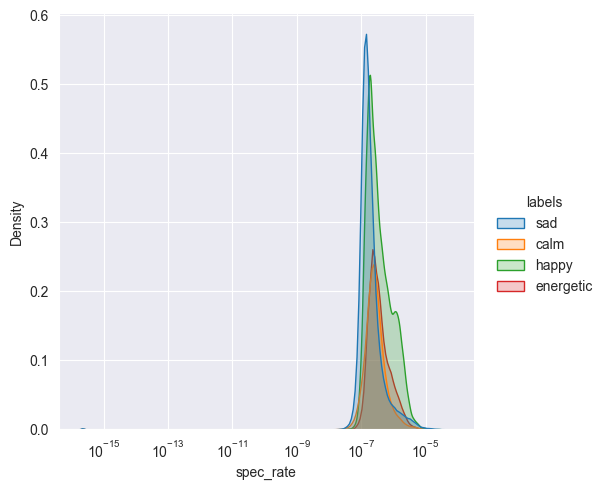

In [96]:
df_train['spec_rate'] += sys.float_info.epsilon
sns.displot(df_train, x="spec_rate", hue="labels", kind="kde", fill=True, log_scale=True)

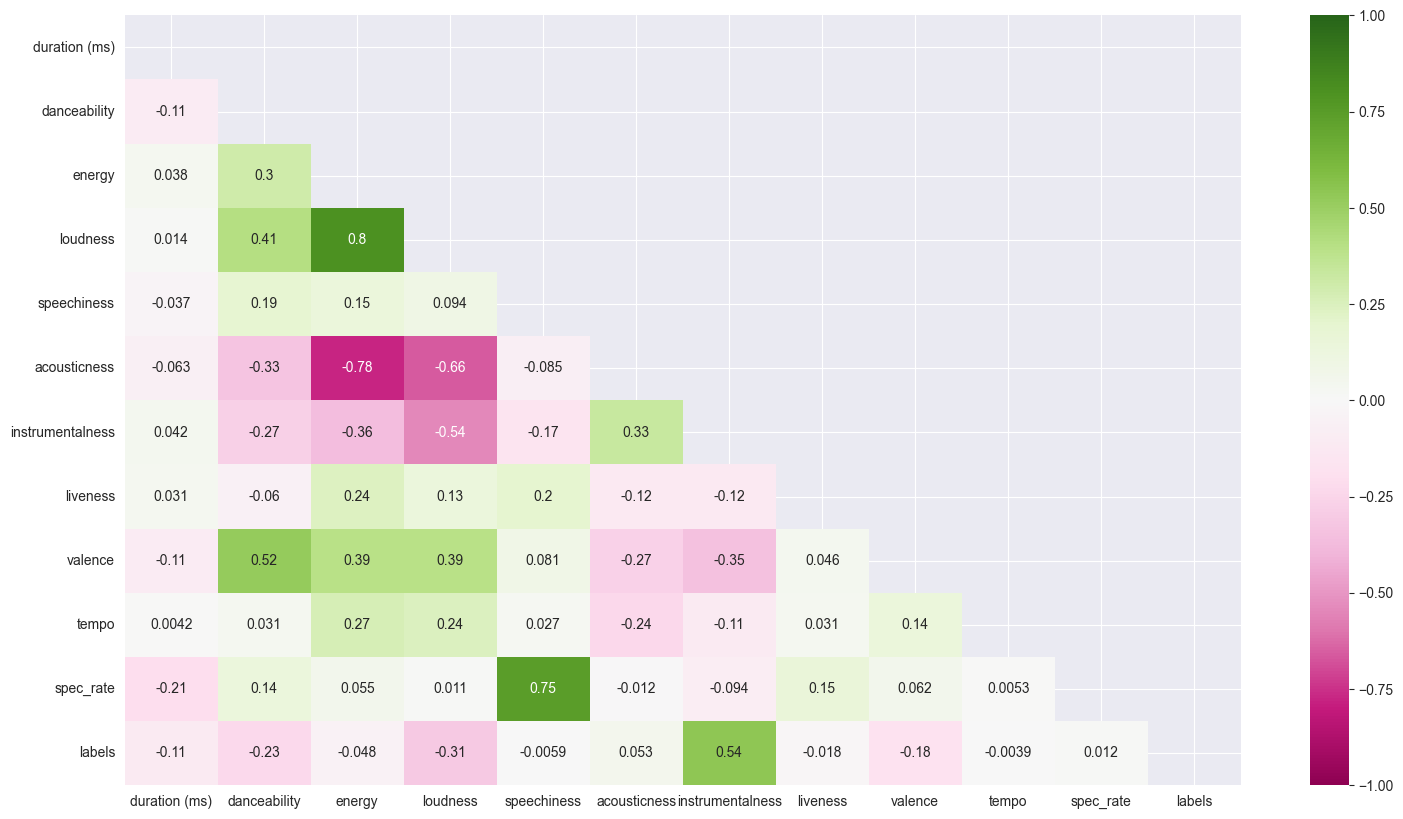

In [103]:
# Correlation between Numerical features
correlation = df_train.drop(["uri", "Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2"], axis=1).corr()
plt.figure(figsize=(18, 10))
sns.heatmap(
    correlation,
    mask=np.triu(np.ones_like(correlation, dtype=bool)),
    annot=True, vmin=-1, vmax=1, cmap="PiYG"
);

Which features shall we use?

Duration: NO
Danecability:  YES
Energy: YES (best)
Loudness: YES (for calm)
Speechiness:  NO
Accousticness: YES
Instrumentalness:  YES (for calm)
Liveness: NO
Valence: YES
Tempo: NO
spec_rate: NO

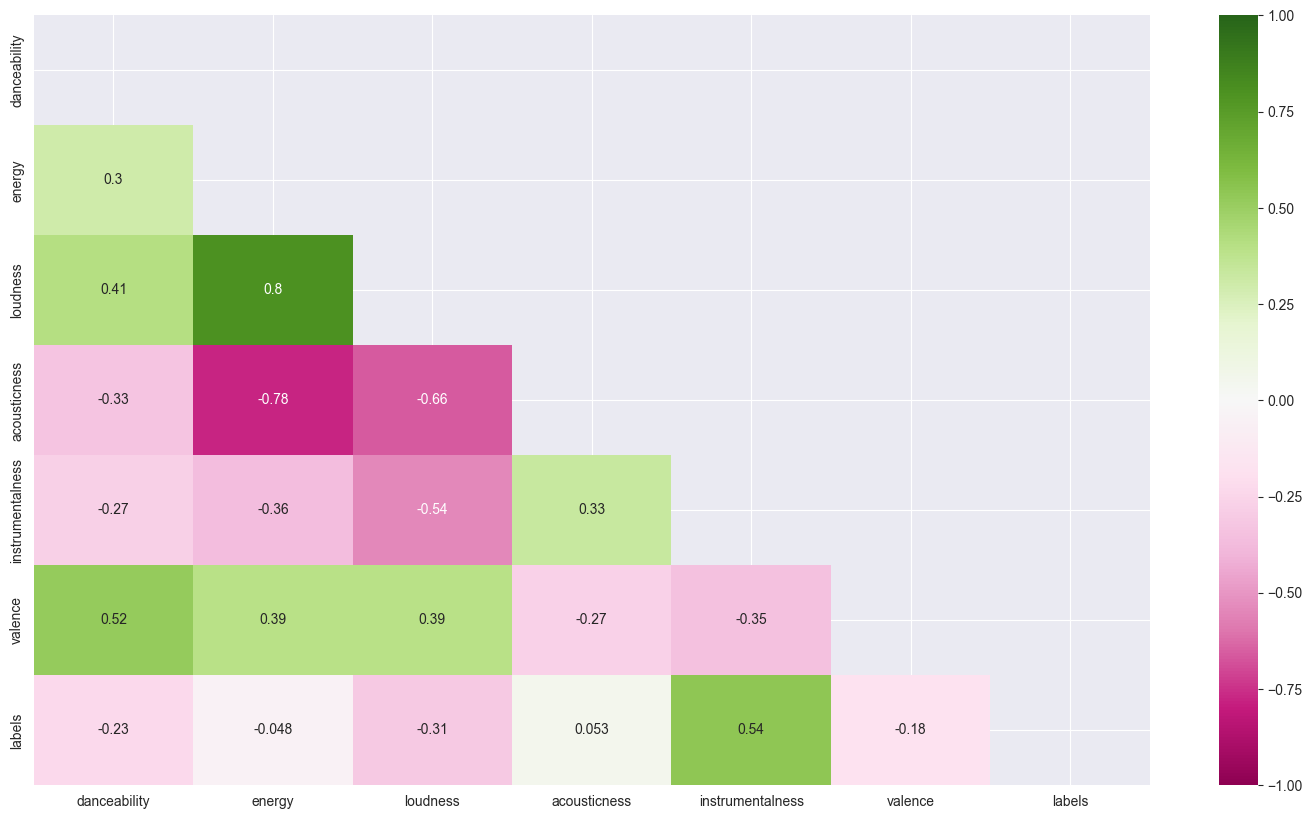

In [104]:
# Correlation between Numerical features
columns_to_drop = ["uri", "Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2", "duration (ms)", "speechiness", "liveness", "tempo", "spec_rate"]
correlation = df_train.drop(columns_to_drop, axis=1).corr()
plt.figure(figsize=(18, 10))
sns.heatmap(
    correlation,
    mask=np.triu(np.ones_like(correlation, dtype=bool)),
    annot=True, vmin=-1, vmax=1, cmap="PiYG"
);